In [4]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
gdp_germany_file = "gdp_germany_table.html"
percentage_military_spending_csv = "military_spending_percentage_gdp.csv"
sipri_excel = "SIPRI-Milex-data-1949-2022.xlsx"

In [54]:
####
government_spending_df = pd.read_csv("miliatry_share_of_government_spending.csv")
government_spending_df = government_spending_df.T.reset_index().rename(columns={'index': 'years', 0: 'perc gov spending'})
government_spending_df['years'] = government_spending_df['years'].astype('int64')
# remove percentage symbol and convert to float
government_spending_df['perc gov spending'] = government_spending_df['perc gov spending'].str.rstrip('%').astype(float)

# divide each value by 100
government_spending_df['perc gov spending'] = government_spending_df['perc gov spending'] / 100

government_spending_df
####

,years,perc gov spending
0,1991,0.0428
1,1992,0.0392
2,1993,0.0351
3,1994,0.0321
4,1995,0.0272
5,1996,0.0297
6,1997,0.0291
7,1998,0.0289
8,1999,0.0290
9,2000,0.0286


In [19]:
percentage_military_spending_df = pd.read_csv(percentage_military_spending_csv, delimiter=",")

In [21]:
perc_df = percentage_military_spending_df.T

In [22]:
perc_df = perc_df.reset_index().rename(columns={'index': 'years', 0: 'percentage'})

In [24]:
perc_df['years'] = perc_df['years'].astype('int64')

In [26]:
# remove percentage symbol and convert to float
perc_df['percentage'] = perc_df['percentage'].str.replace(',', '.').str.rstrip('%').astype(float)

# divide each value by 100
perc_df['percentage'] = perc_df['percentage'] / 100

In [28]:
perc_df

,years,percentage
0,1953,0.0397
1,1954,0.0374
2,1955,0.0384
3,1956,0.0341
4,1957,0.0390
...,...,...
64,2017,0.0115
65,2018,0.0117
66,2019,0.0126
67,2020,0.0139


In [29]:
####################################################

In [30]:
gdp_df = pd.read_html(gdp_germany_file)[0].rename(columns={'Merkmal': 'years', 'Bruttoinlandsprodukt in Milliarden Euro': 'gdp in bn EURO'})

In [31]:
gdp_df['gdp in bn EURO'] = gdp_df['gdp in bn EURO'].str.replace(',', '').str.replace('.', '')
gdp_df["gdp in bn EURO"] = gdp_df['gdp in bn EURO'].astype('float')/100

/tmp/ipykernel_23684/640396110.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gdp_df['gdp in bn EURO'] = gdp_df['gdp in bn EURO'].str.replace(',', '').str.replace('.', '')


In [34]:
perc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   years       69 non-null     int64  
 1   percentage  69 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.2 KB


In [57]:
df = gdp_df.join(perc_df.set_index('years'), on='years')
df = df.join(government_spending_df.set_index('years'), on='years')

In [58]:
#####

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   years              73 non-null     int64  
 1   gdp in bn EURO     73 non-null     float64
 2   percentage         69 non-null     float64
 3   perc gov spending  31 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.4 KB


In [60]:
df["military_spending in bn EURO"] = df["gdp in bn EURO"] * df["percentage"]

In [61]:
df.dropna()

,years,gdp in bn EURO,percentage,perc gov spending,military_spending in bn EURO
1,2021,3601.75,0.0134,0.0252,48.263450
2,2020,3405.43,0.0139,0.0273,47.335477
3,2019,3473.26,0.0126,0.0280,43.763076
4,2018,3365.45,0.0117,0.0263,39.375765
5,2017,3267.16,0.0115,0.0261,37.572340
6,2016,3134.74,0.0115,0.0259,36.049510
7,2015,3026.18,0.0114,0.0258,34.498452
8,2014,2927.43,0.0115,0.0260,33.665445
9,2013,2811.35,0.0119,0.0264,33.455065
10,2012,2745.31,0.0124,0.0276,34.041844


In [62]:
visualize_df = df[["years", "military_spending in bn EURO"]].dropna()

In [65]:
percentage_gov_spending = df[["years", "perc gov spending"]]

In [63]:
visualize_df

,years,military_spending in bn EURO
1,2021,48.263450
2,2020,47.335477
3,2019,43.763076
4,2018,39.375765
5,2017,37.572340
...,...,...
65,1957,4.318080
66,1956,3.463878
67,1955,3.528576
68,1954,3.007334


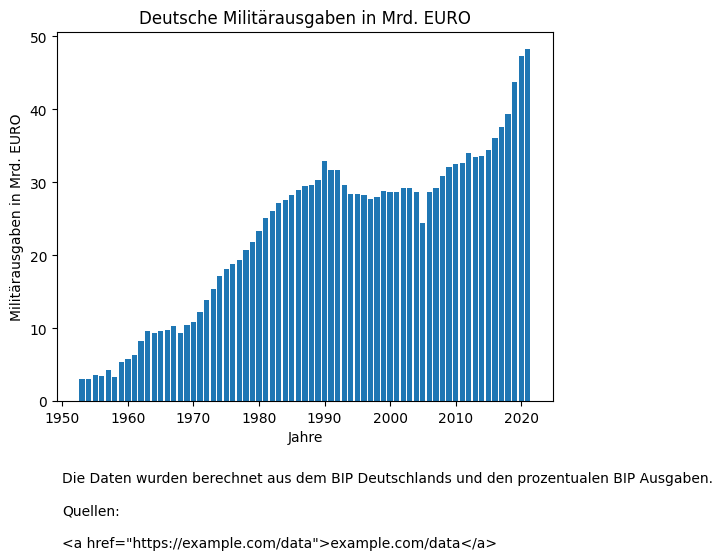

In [42]:
plt.bar(visualize_df['years'], visualize_df['military_spending in bn EURO'])

# add labels and title
plt.xlabel('Jahre')
plt.ylabel('Militärausgaben in Mrd. EURO')
plt.title('Deutsche Militärausgaben in Mrd. EURO')
description = '''Die Daten wurden berechnet aus dem BIP Deutschlands und den prozentualen BIP Ausgaben.\n
Quellen:\n
<a href="https://example.com/data">example.com/data</a>'''
plt.text(1950, -20, description, fontsize=10, verticalalignment='baseline')

# display chart
plt.show()

In [64]:
###

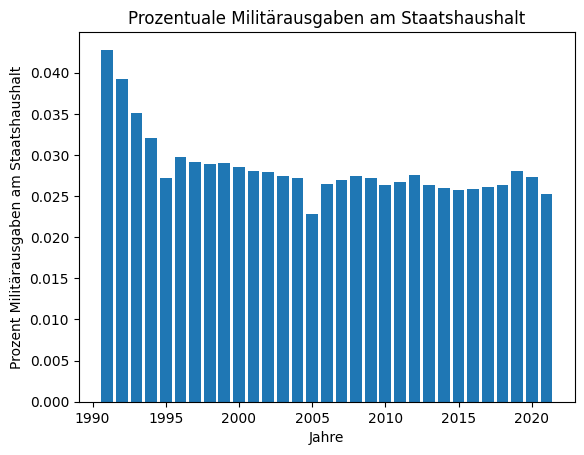

In [68]:
p_df = percentage_gov_spending.dropna()
plt.bar(p_df['years'], p_df['perc gov spending'])

# add labels and title
plt.xlabel('Jahre')
plt.ylabel('Prozent Militärausgaben am Staatshaushalt')
plt.title('Prozentuale Militärausgaben am Staatshaushalt')

# display chart
plt.show()